In [174]:
import pandas as pd
import category_encoders as ce
import numpy as np

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Датасет болезней сердца содержит информацию о пациентах и переменную предсказания target — наличие у пациента болезни сердца.

Датасет содержит следующие признаки:

* age — возраст
* sex — пол (1 - мужчина, 0 - женщина)
* cp — тип боли в груди (4 значения)
* trestbps — артериальное давление в покое
* chol — холестерин сыворотки в мг/дл
* fbs — уровень сахара в крови натощак > 120 мг/дл
* restecg — результаты электрокардиографии в покое (значения 0,1,2)
* thalach — достигнута максимальная частота сердечных сокращений
* exang — стенокардия, вызванная физической нагрузкой
* oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
* slope — наклон пикового сегмента ST при нагрузке
* ca — количество крупных сосудов (0-3), окрашенных при флюроскопии
* thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект

In [175]:
heart = pd.read_csv('data/heart.zip')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### 8.1
Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.

В ответ введите результат выполнения кода heart['old'].sum()

In [176]:
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)
heart['old'].sum()

79

### 8.2
Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.

Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.

| Возраст (лет)	| Мужчины	| Женщины |
| --- | --- | --- |
| до 20 |	123/76 |	116/72 |
| 21-30 |	126/79 |	120/75 | 
| 31-40 |	129/81 |	127/80 |
| 41-50 |	135/83 |	137/84 |
| 51-60 |	142/85 |	144/85 |
| 61 и старше |	142/80 |	159/85 |

В ответ напишите значение признака trestbps_mean для пациента под номером 300.

In [177]:
def get_trestbps_by_age_and_sex(heart_row):
    return {
              heart_row['age'] <= 20: 123 if heart_row['sex'] else 116,
        21 <= heart_row['age'] <= 30: 126 if heart_row['sex'] else 120,
        31 <= heart_row['age'] <= 40: 129 if heart_row['sex'] else 127,
        41 <= heart_row['age'] <= 50: 135 if heart_row['sex'] else 137,
        51 <= heart_row['age'] <= 60: 142 if heart_row['sex'] else 144,
        61 <= heart_row['age']:       142 if heart_row['sex'] else 159
    }[True]
    
    
heart['trestbps_mean'] = heart.apply(get_trestbps_by_age_and_sex, axis=1)
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,144
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,135
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,142
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,142


### 8.5
Раскодируйте вышеперечисленные признаки методом OneHotEncoding без удаления исходных признаков.

Сколько признаков получилось в датасете?

In [178]:
oh_encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'])
cp_bin = oh_encoder.fit_transform(heart[['cp', 'restecg', 'slope', 'ca', 'thal']])
heart = pd.concat([heart, cp_bin], axis=1)
heart.shape


(303, 35)

### 8.6
Нормализуйте все числовые признаки подходящим способом.

В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


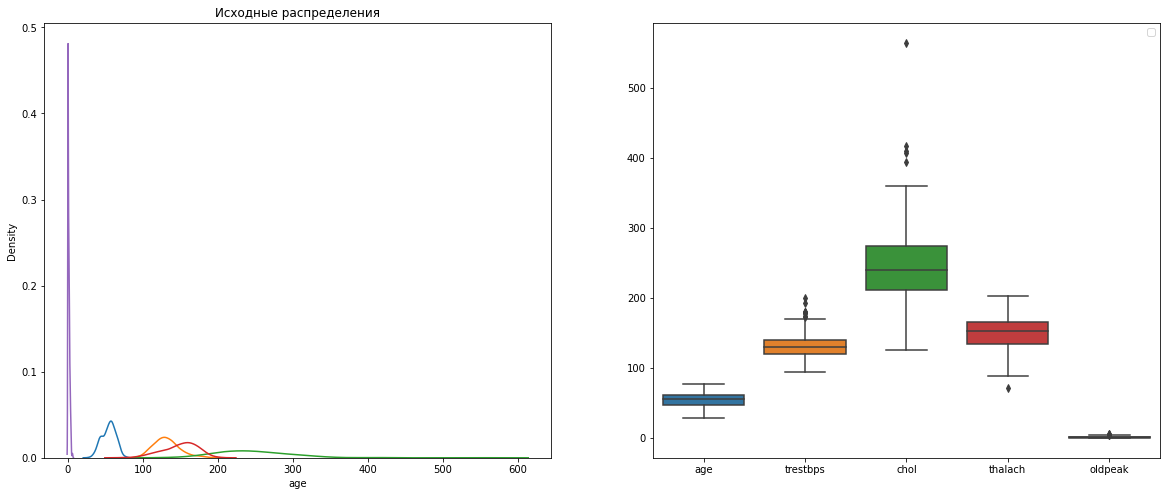

In [179]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(heart['age'], ax=ax1, label ='age')
sns.kdeplot(heart['trestbps'], ax=ax1, label ='trestbps')
sns.kdeplot(heart['chol'], ax=ax1, label ='chol')
sns.kdeplot(heart['thalach'], ax=ax1, label ='thalach')
sns.kdeplot(heart['oldpeak'], ax=ax1, label ='oldpeak')

# ищем выбросы
sns.boxplot(data=heart[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']], ax=ax2)

# heart[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]

plt.legend()

In [180]:
mm_scaler = preprocessing.MinMaxScaler()
heart_mm = mm_scaler.fit_transform(heart[['age', 'trestbps', 'thalach', 'oldpeak']])
heart_mm =  pd.DataFrame(heart_mm, columns=['age_mm', 'trestbps_mm', 'thalach_mm', 'oldpeak_mm'])
heart = pd.concat([heart, heart_mm], axis=1)

In [181]:
r_scaler = preprocessing.RobustScaler()
heart_r = r_scaler.fit_transform(pd.DataFrame(heart['chol']))
heart_r = pd.DataFrame(heart_r, columns=['chol_r'])
heart = pd.concat([heart, heart_r], axis=1)

In [182]:
# round(np.std(heart['chol_r']),6)
heart['chol_r'].describe()

count    303.000000
mean       0.098646
std        0.816232
min       -1.795276
25%       -0.456693
50%        0.000000
75%        0.543307
max        5.102362
Name: chol_r, dtype: float64

### 8.7
Проведите корреляционный анализ и отберите признаки для будущей модели. Выберите пары сильно скоррелированных признаков.

<AxesSubplot:title={'center':'Тепловая карта корреляции'}>

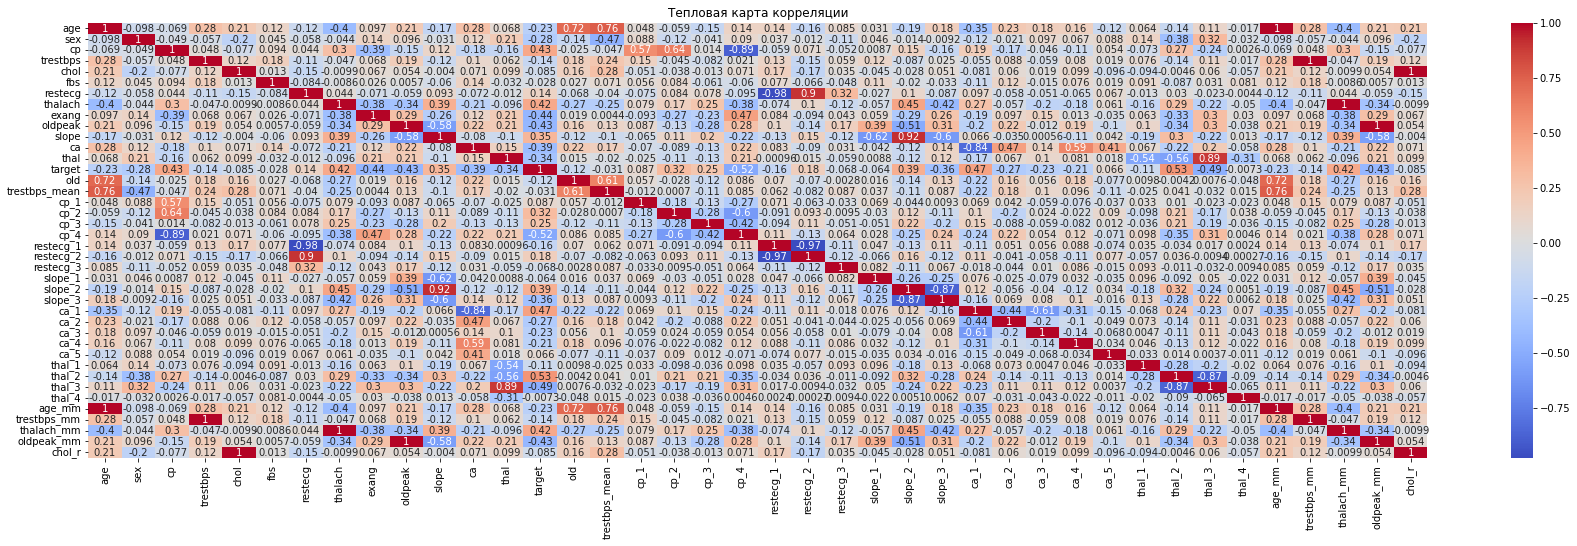

In [183]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(30, 8))
ax1.set_title('Тепловая карта корреляции')
sns.heatmap(heart.corr(), annot=True, cmap='coolwarm')